#Import Libraries

In [293]:
#Import all relevant libraries
import pandas as pd
import numpy as np
import plotly.express as px
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

#Acquire Data

In [294]:
#Training and test datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

#Analyze Data (Perform EDA)

In [295]:
#see an exemplar of the first five entries
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [296]:
#Understand amount of missing entries and data types for each feature
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [297]:
#Distribution of numerical data at 2nd, 25th, 50th, 75th, and 99th percentile
df_train.describe(percentiles=[.02, .25, .5, 0.75, .99])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
2%,18.800000,0.000000,1.000000,2.000000,0.000000,0.000000,6.397500
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
99%,882.100000,1.000000,3.000000,65.870000,5.000000,4.000000,249.006220
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [298]:
#distribution of categorical data (of type 'Object')
df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sdycoff, Mr. Todor",male,347082,B96 B98,S
freq,1,577,7,4,644


In [299]:
#Survival rates by sex
Sex_pivot = df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Sex', ascending=False)

Sex_pivot

,Sex,Survived
1,male,0.188908
0,female,0.742038


In [300]:
for i in range(len(Sex_pivot)):
  print(f"The likelihood of survival for a {Sex_pivot.columns[0]} = {Sex_pivot.loc[i][0]} passenger was {round(Sex_pivot.loc[i][1]*100,2)}%")

The likelihood of survival for a Sex = female passenger was 74.2%
The likelihood of survival for a Sex = male passenger was 18.89%


In [301]:
#Survival rates by socio-economic class
Pclass_pivot = df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

Pclass_pivot

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [302]:
for i in range(len(Pclass_pivot)):
  print(f"The likelihood of survival for a {Pclass_pivot.columns[0]} = {Pclass_pivot.loc[i][0]} passenger was {round(Pclass_pivot.loc[i][1] * 100,2)}%")

The likelihood of survival for a Pclass = 1.0 passenger was 62.96%
The likelihood of survival for a Pclass = 2.0 passenger was 47.28%
The likelihood of survival for a Pclass = 3.0 passenger was 24.24%


In [303]:
#Survival rates by number of Siblings and Spouses
sameAge_pivot = df_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

sameAge_pivot

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [304]:
for i in range(len(sameAge_pivot)):
  print(f"The likelihood of survival for a {sameAge_pivot.columns[0]} = {sameAge_pivot.loc[i][0]} passenger was {round(sameAge_pivot.loc[i][1]*100,2)}%")

The likelihood of survival for a SibSp = 0.0 passenger was 34.54%
The likelihood of survival for a SibSp = 1.0 passenger was 53.59%
The likelihood of survival for a SibSp = 2.0 passenger was 46.43%
The likelihood of survival for a SibSp = 3.0 passenger was 25.0%
The likelihood of survival for a SibSp = 4.0 passenger was 16.67%
The likelihood of survival for a SibSp = 5.0 passenger was 0.0%
The likelihood of survival for a SibSp = 8.0 passenger was 0.0%


In [305]:
#Survival rates by number of children and parents
youngAndOld_pivot = df_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

youngAndOld_pivot

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [306]:
for i in range(len(youngAndOld_pivot)):
  print(f'The likelihood of survival for a {youngAndOld_pivot.columns[0]} = {youngAndOld_pivot.loc[i][0]} passenger was {round(youngAndOld_pivot.loc[i][1]*100,2)}%')

The likelihood of survival for a Parch = 0.0 passenger was 34.37%
The likelihood of survival for a Parch = 1.0 passenger was 55.08%
The likelihood of survival for a Parch = 2.0 passenger was 50.0%
The likelihood of survival for a Parch = 3.0 passenger was 60.0%
The likelihood of survival for a Parch = 4.0 passenger was 0.0%
The likelihood of survival for a Parch = 5.0 passenger was 20.0%
The likelihood of survival for a Parch = 6.0 passenger was 0.0%


In [307]:
#Survival rates by age (banded into 20 bins)
age = px.histogram(df_train, x='Age', facet_row='Survived', range_x=[0,100], nbins=20)
age

In [308]:
#Passenger outcome by age and social class
socioEcon = px.histogram(df_train, x='Age', facet_row='Pclass', facet_col='Survived', nbins=20)
socioEcon

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning:

Using the pointplot function without specifying `order` is likely to produce an incorrect plot.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:648: UserWarning:

Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.



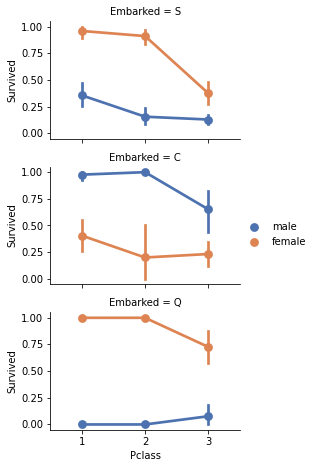

In [309]:
#Survival rates by port of embarkation (and sex)
grid = sns.FacetGrid(df_train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning:

Using the barplot function without specifying `order` is likely to produce an incorrect plot.



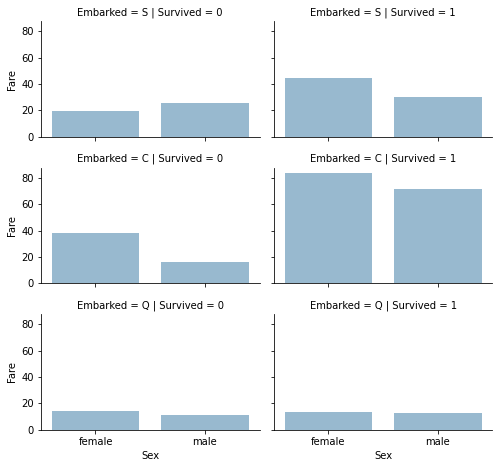

In [310]:
#Survival rates by sex, fare, and port of embarkation 
numerous = sns.FacetGrid(df_train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
numerous.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

#Wrangle data

In [311]:
#Show shape of the dataset (and combine into a list for simple iteration when 
#need  to apply same function over both the training and testing data sets)
print("Before: ", df_train.shape, df_test.shape)

df_train = df_train.drop(['Ticket', 'Cabin'], axis=1)
df_test = df_test.drop(['Ticket', 'Cabin'], axis=1)
combine = [df_train, df_test]

print("After: ", df_train.shape, df_test.shape)

Before:  (891, 12) (418, 11)
After:  (891, 10) (418, 9)


In [312]:
#Use Regex to obtain the tite for each passenger
for dataset in combine:
  dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

#print all found titles and their respective frequencies depending on Sex
pd.crosstab(df_train['Title'], df_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [313]:
#Replace rare prefix names with single title 'Rare' and uncommon versions with more common (Ms -> Miss)
for dataset in combine:
  dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major', 'Rev', 'Sir'], 'Rare')

  dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
  dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
  dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')

df_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


In [314]:
#Map each of the categories into an ordinal set of numbers
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
for dataset in combine:
  dataset['Title'] = dataset['Title'].map(title_mapping)
  dataset['Title'] = dataset['Title'].fillna(0)

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [315]:
#Drop passenger ID and name from the DataFrame
df_train = df_train.drop(['PassengerId', 'Name'], axis=1)
df_test = df_test.drop(['Name'], axis=1)
combine= [df_train, df_test]

In [316]:
#Convert the categorical Sex feature into a discrete numerical feature
for dataset in combine:
  dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}).astype(int)

df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [317]:
#Looking at age (to find average to fill in missing values) as a function of Pclass and Sex
medianAge = px.histogram(df_train, x='Age', facet_row='Pclass', facet_col='Sex', nbins=20)
medianAge

In [318]:
#Prepare an empty array to contain guessed Age values based on Pclass and Sex combinations
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [319]:
#Iterate over sex
for dataset in combine:
  for i in range(0,2):
    for j in range(0,3):
      guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

      age_guess = guess_df.median()

      guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
    
  for i in range(0,2):
    for j in range(0,3):
      dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]

  dataset['Age'] = dataset['Age'].astype(int)

df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int64  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 62.8+ KB


In [320]:
#Created age bands (turn continuous data into discrete data) and correlate with survival
df_train['AgeBand'] = pd.cut(df_train['Age'], 5)
df_train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [321]:
#Change Age to ordinal values reflecting the AgeBands
for dataset in combine:
  dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
  dataset.loc[ (dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
  dataset.loc[ (dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
  dataset.loc[ (dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
  dataset.loc[ dataset['Age'] > 64, 'Age'] = 4
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [322]:
#Can now remove AgeBand
df_train = df_train.drop(['AgeBand'], axis=1)
combine = [df_train, df_test]
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [323]:
#create the new feature "FamilySize" that summarizes data from the aforementioned two
for dataset in combine:
  #add one to include the passenger in the family size
  dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [324]:
#Drop all other family information (as that is now summarized in the FamilySize data point)
df_train = df_train.drop(['Parch', 'SibSp'], axis=1)
df_test = df_test.drop(['Parch', 'SibSp'], axis=1)
combine = [df_train, df_test]

df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1,7.2500,S,1,2
1,1,1,1,2,71.2833,C,3,2
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,2
4,0,3,0,2,8.0500,S,1,1


In [325]:
#Fill 2 missing port of embarkation entries (out of 891) with the most common appearance
freq_port = df_train['Embarked'].mode()[0]
freq_port

'S'

In [326]:
#Fill in missing port-of-embarkation data with 'S'
for dataset in combine:
  dataset.loc[ dataset['Embarked'].isnull(), 'Embarked'] = freq_port

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Embarked    891 non-null    object 
 6   Title       891 non-null    int64  
 7   FamilySize  891 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 55.8+ KB


In [327]:
#Survival rate by port of embarkation
embarkation_S = df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
embarkation_S

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [328]:
#Convert categorical data into numerical data
for dataset in combine:
  dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'Q':1, 'C':2}).astype(int)

df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1,7.2500,0,1,2
1,1,1,1,2,71.2833,2,3,2
2,1,3,1,1,7.9250,0,2,1
3,1,1,1,2,53.1000,0,3,2
4,0,3,0,2,8.0500,0,1,1


In [329]:
#Filling in missing data for Fare from test dataset 
df_test['Fare'].fillna(df_test['Fare'].dropna().median(), inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    int64  
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int64  
 6   Title        418 non-null    float64
 7   FamilySize   418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [330]:
#banding the fare feature
df_train['FareBand'] = pd.qcut(df_train['Fare'], 4)

df_train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [331]:
#Translate banded intervals into ordinal numbers 
for dataset in combine:
  dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
  dataset.loc[ (dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
  dataset.loc[ (dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
  dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3

df_train.drop(['FareBand'], axis=1, inplace=True)

combine = [df_train, df_test]

df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,3,0,1,0.0,0,1,2
1,1,1,1,2,3.0,2,3,2
2,1,3,1,1,1.0,0,2,1
3,1,1,1,2,3.0,0,3,2
4,0,3,0,2,1.0,0,1,1


#Modelling

In [332]:
df_test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,892,3,0,2,0.0,1,1.0,1
1,893,3,1,2,0.0,0,3.0,2
2,894,2,0,3,1.0,1,1.0,1
3,895,3,0,1,1.0,0,1.0,1
4,896,3,1,1,1.0,0,3.0,3
...,...,...,...,...,...,...,...,...
413,1305,3,0,1,1.0,0,1.0,1
414,1306,1,1,2,3.0,2,0.0,1
415,1307,3,0,2,0.0,0,1.0,1
416,1308,3,0,1,1.0,0,1.0,1


In [333]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train['Survived']
X_test = df_test.drop("PassengerId", axis=1)
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

###Logistic Regression

In [334]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred1 = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

print(f"{acc_log}%")

81.71%


In [335]:
#create dataframe
coeff_df = pd.DataFrame()

#First column is a list of all the features (independent variables)
coeff_df['Feature'] = df_train.columns.delete(0)

#Second column is a Pandas series 
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.243017
5,Title,0.497115
3,Fare,0.247682
4,Embarked,0.217178
6,FamilySize,-0.376560
2,Age,-0.655044
0,Pclass,-0.936631


In [336]:
df_test['Survived'] = Y_pred1
df_test1 = df_test[['PassengerId', 'Survived']]
df_test1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


###Support Vector Machine

In [337]:
#Support Vector Machine

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred2 = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print(f"{acc_svc}%")

83.39%


In [338]:
df_test['Survived'] = Y_pred2
df_test2 = df_test[['PassengerId', 'Survived']]
df_test2

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


###K-Nearest Neighbours

In [339]:
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train, Y_train)
Y_pred3 = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print(f"{acc_knn}%")

86.2%


In [340]:
df_test['Survived'] = Y_pred3
df_test3 = df_test[['PassengerId', 'Survived']]
df_test3

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


###Decision Tree

In [341]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred4 = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print(f"{acc_decision_tree}%")

88.55%


In [342]:
df_test['Survived'] = Y_pred4
df_test4 = df_test[['PassengerId', 'Survived']]
df_test4

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


###Random Forest

In [343]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred5 = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train)*100, 2)
print(f"{acc_random_forest}%")

88.55%


In [344]:
df_test['Survived'] = Y_pred5
df_test5 = df_test[['PassengerId', 'Survived']]
df_test5

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


###XGBoost Classifier

In [345]:
xgbclassifier = XGBClassifier()
xgbclassifier.fit(X_train, Y_train)
Y_pred6 = xgbclassifier.predict(X_test)

In [346]:
df_test['Survived'] = Y_pred6
df_test6 = df_test[['PassengerId', 'Survived']]
df_test6

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


###Model Evaluation

In [349]:
#DataFrame containing accuracy of all models
models = pd.DataFrame({
    'Model' : ['Support Vector Machines', 'KNN', 'Logistic Regression',
    'Random Forest', 'Decision Tree'],
    'Score' : [acc_svc, acc_knn, acc_log, acc_random_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,88.55
4,Decision Tree,88.55
1,KNN,86.20
0,Support Vector Machines,83.39
2,Logistic Regression,81.71




#Old Models (No longer needed, ignore this section)

###Importing


In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_train.head()
df_train = df_train[['PassengerId', 'Survived', 'Pclass', 'Sex', 'SibSp', 'Parch']]
df_train = df_train.dropna()
df_train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch
0,1,0,3,male,1,0
1,2,1,1,female,1,0
2,3,1,3,female,0,0
3,4,1,1,female,1,0
4,5,0,3,male,0,0


###Encoding categorical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df_train['Sex'] = le.fit_transform(df_train['Sex'])
df_train['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64

###Splitting Features and Label

In [ ]:
X = df_train.iloc[:, 2:].values
y = df_train.iloc[:,1].values
print(X)

[[3 1 1 0]
 [1 0 1 0]
 [3 0 0 0]
 ...
 [3 0 1 2]
 [1 1 0 0]
 [3 1 0 0]]


###Split Data into Training and Testing Set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

###Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

###Training

Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
fclassifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
fclassifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

###Predicting the Test set results

In [ ]:
#Logistic regression
y_pred = classifier.predict(X_test)

#Random forest
y_pred2 = fclassifier.predict(X_test)

###Making a confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[94  9]
 [29 47]]


0.7877094972067039

In [ ]:
cm = confusion_matrix(y_test, y_pred2)
print(cm)
accuracy_score(y_test, y_pred2)

[[94  9]
 [30 46]]


0.7821229050279329

#Testing Models (No longer needed, ignore this section)

###Splitting 

In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df_testing = df_test[['Pclass', 'Sex', 'SibSp', 'Parch']]

In [ ]:

df_testing['Sex'] = le.fit_transform(df_testing['Sex'])
X_submit = df_testing.values


X_submit = sc.fit_transform(X_submit)
print(len(X_submit))

418


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
y_submit = classifier.predict(X_submit)

#df_test = df_test['PassengerId']
df_test['Survived'] = y_submit
df_test = df_test[['PassengerId', 'Survived']]

In [ ]:
y_submit = fclassifier.predict(X_submit)

#df_test = df_test['PassengerId']
df_test['Survived'] = y_submit
df_test = df_test[['PassengerId', 'Survived']]

In [ ]:
df_test

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


#Save Dataframe as CSV for submission

In [348]:
#Save the dataframe to a csv file to be submitted to Kaggle
df_test6.to_csv('submission10.csv', index=False)